# Mediascope

Три таблицы содержащие данные о событиях нажатия кнопки «нет зрителей» в домохозяйстве на конкретном телевизоре. 

Кнопка «нет зрителей» предполагает, что ТВ может быть включен и присутствует какой-то контент, но в это время в комнате, где стоит телевизор никого нет. 

При этом зафиксированы случаи, когда при нажатой кнопке «нет зрителей» осуществляется переключение каналов. 

Необходимо оценить объемы смотрения телеканалов в таких случаях.

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Длительность каждой сессии смотрения на листе "Все события»;

In [2]:
# Прочитал таблицу из файла
all_event = pd.read_excel('Тестовое задание_Нет зрителей.xlsx', sheet_name='Все события')

- Общая информация по датафреймам

In [3]:
def df_info(df): 
    print(df.info())
    display(df.head())
    display(df.describe())
    print('Пропущенные значения в датафрейме:')
    print(df.isna().sum())
    print('\nДубликаты:', df.duplicated().sum()) 

In [4]:
df_info(all_event)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212784 entries, 0 to 212783
Data columns (total 10 columns):
Дата                                 212784 non-null datetime64[ns]
Договор                              212784 non-null object
Проект                               212784 non-null object
Серийный номер прибора               212784 non-null int64
Время нажатия кнопки НЕТ зрителей    212784 non-null object
Время отжатия кнопки НЕТ зрителей    212784 non-null object
ReferenceID                          206276 non-null float64
ReferenceName                        206275 non-null object
Время начала смотрения               206276 non-null object
Время окончания смотрения            206276 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 16.2+ MB
None


,Дата,Договор,Проект,Серийный номер прибора,Время нажатия кнопки НЕТ зрителей,Время отжатия кнопки НЕТ зрителей,ReferenceID,ReferenceName,Время начала смотрения,Время окончания смотрения
0,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00.000,2020-12-01 07:52:35.000,499.0,ПЕРВЫЙ КАНАЛ,2020-12-01 05:16:22.000,2020-12-01 07:52:35.000
1,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00.000,2020-12-01 07:52:35.000,500.0,ПЯТЫЙ КАНАЛ,2020-12-01 02:06:40.000,2020-12-01 05:16:22.000
2,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00.000,2020-12-01 07:52:35.000,501.0,"РОССИЯ 1 / ГТРК ""ХАБАРОВСК""",2020-12-01 02:00:00.000,2020-12-01 02:06:40.000
3,2020-12-01,1000616,Дом,701327,2020-12-01 07:53:13.000,2020-12-01 10:56:00.000,501.0,"РОССИЯ 1 / ГТРК ""ХАБАРОВСК""",2020-12-01 10:45:45.000,2020-12-01 10:48:49.000
4,2020-12-01,1000616,Дом,701327,2020-12-01 07:53:13.000,2020-12-01 10:56:00.000,501.0,"РОССИЯ 1 / ГТРК ""ХАБАРОВСК""",2020-12-01 10:01:36.000,2020-12-01 10:16:47.000


,Серийный номер прибора,ReferenceID
count,212784.000000,206276.000000
mean,734113.399931,405.045817
std,20516.926847,328.984776
min,688472.000000,1.000000
25%,722885.000000,93.000000
50%,728887.000000,321.000000
75%,748726.000000,743.000000
max,765783.000000,999.000000


Пропущенные значения в датафрейме:
Дата                                    0
Договор                                 0
Проект                                  0
Серийный номер прибора                  0
Время нажатия кнопки НЕТ зрителей       0
Время отжатия кнопки НЕТ зрителей       0
ReferenceID                          6508
ReferenceName                        6509
Время начала смотрения               6508
Время окончания смотрения            6508
dtype: int64

Дубликаты: 1624


In [5]:
# Удаляем дубликат
print(all_event.shape)
all_event = all_event.drop_duplicates()
print(all_event.shape)

(212784, 10)
(211160, 10)


In [6]:
# Удаляем нули
all_event=all_event.dropna()
all_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204655 entries, 0 to 212783
Data columns (total 10 columns):
Дата                                 204655 non-null datetime64[ns]
Договор                              204655 non-null object
Проект                               204655 non-null object
Серийный номер прибора               204655 non-null int64
Время нажатия кнопки НЕТ зрителей    204655 non-null object
Время отжатия кнопки НЕТ зрителей    204655 non-null object
ReferenceID                          204655 non-null float64
ReferenceName                        204655 non-null object
Время начала смотрения               204655 non-null object
Время окончания смотрения            204655 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 17.2+ MB


In [7]:
#Данная функция меняет формат данных в колонке на нужный
def to_datetime(df, time, format):
    df[time] = pd.to_datetime(df[time], format=format)

In [8]:
to_datetime(all_event, 'Время окончания смотрения', '%Y-%m-%d %H:%M:%S')
to_datetime(all_event, 'Время начала смотрения', '%Y-%m-%d %H:%M:%S')

In [9]:
# Посчитал длительность каждой сессии смотрения
all_event['session_duration']=all_event['Время окончания смотрения']-all_event['Время начала смотрения']

In [10]:
all_event.head()

,Дата,Договор,Проект,Серийный номер прибора,Время нажатия кнопки НЕТ зрителей,Время отжатия кнопки НЕТ зрителей,ReferenceID,ReferenceName,Время начала смотрения,Время окончания смотрения,session_duration
0,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00.000,2020-12-01 07:52:35.000,499.0,ПЕРВЫЙ КАНАЛ,2020-12-01 05:16:22,2020-12-01 07:52:35,02:36:13
1,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00.000,2020-12-01 07:52:35.000,500.0,ПЯТЫЙ КАНАЛ,2020-12-01 02:06:40,2020-12-01 05:16:22,03:09:42
2,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00.000,2020-12-01 07:52:35.000,501.0,"РОССИЯ 1 / ГТРК ""ХАБАРОВСК""",2020-12-01 02:00:00,2020-12-01 02:06:40,00:06:40
3,2020-12-01,1000616,Дом,701327,2020-12-01 07:53:13.000,2020-12-01 10:56:00.000,501.0,"РОССИЯ 1 / ГТРК ""ХАБАРОВСК""",2020-12-01 10:45:45,2020-12-01 10:48:49,00:03:04
4,2020-12-01,1000616,Дом,701327,2020-12-01 07:53:13.000,2020-12-01 10:56:00.000,501.0,"РОССИЯ 1 / ГТРК ""ХАБАРОВСК""",2020-12-01 10:01:36,2020-12-01 10:16:47,00:15:11


### Длительность каждой сессии нажатия кнопки на листе «Все события»  ;

In [11]:
to_datetime(all_event, 'Время нажатия кнопки НЕТ зрителей', '%Y-%m-%d %H:%M:%S')
to_datetime(all_event, 'Время отжатия кнопки НЕТ зрителей', '%Y-%m-%d %H:%M:%S')

In [12]:
# Посчитал длительность каждой сессии нажатия кнопки
all_event['out_duration']=all_event['Время отжатия кнопки НЕТ зрителей']-all_event['Время нажатия кнопки НЕТ зрителей']

In [72]:
all_event.head()

,Дата,Договор,Проект,Серийный номер прибора,Время нажатия кнопки НЕТ зрителей,Время отжатия кнопки НЕТ зрителей,ReferenceID,ReferenceName,Время начала смотрения,Время окончания смотрения,session_duration,out_duration,watch_start,watch_end
0,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00,2020-12-01 07:52:35,499.0,ПЕРВЫЙ КАНАЛ,2020-12-01 05:16:22,2020-12-01 07:52:35,02:36:13,05:52:35,03:16:22,05:52:35
1,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00,2020-12-01 07:52:35,500.0,ПЯТЫЙ КАНАЛ,2020-12-01 02:06:40,2020-12-01 05:16:22,03:09:42,05:52:35,00:06:40,03:16:22
2,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00,2020-12-01 07:52:35,501.0,РОССИЯ 1,2020-12-01 02:00:00,2020-12-01 02:06:40,00:06:40,05:52:35,00:00:00,00:06:40
3,2020-12-01,1000616,Дом,701327,2020-12-01 07:53:13,2020-12-01 10:56:00,501.0,РОССИЯ 1,2020-12-01 10:45:45,2020-12-01 10:48:49,00:03:04,03:02:47,08:45:45,08:48:49
4,2020-12-01,1000616,Дом,701327,2020-12-01 07:53:13,2020-12-01 10:56:00,501.0,РОССИЯ 1,2020-12-01 10:01:36,2020-12-01 10:16:47,00:15:11,03:02:47,08:01:36,08:16:47


### на какие каналы приходится наибольший объем смотрения, на какие наименьший? 

In [13]:
all_event.ReferenceName.unique()

array(['ПЕРВЫЙ КАНАЛ', 'ПЯТЫЙ КАНАЛ', 'РОССИЯ 1 / ГТРК "ХАБАРОВСК"',
       'РОССИЯ 24 / ГТРК "ХАБАРОВСК"', 'РОССИЯ К', 'ОТР', 'СТС',
       'ТВ ЦЕНТР', 'РЕН ТВ', '6 ТВ', 'МУЛЬТ', 'НТВ', 'ДОМАШНИЙ', 'СПАС',
       'ЗВЕЗДА', 'РОССИЯ 24 / ГТРК "ПЕТЕРБУРГ"', 'РОССИЯ 24', 'ТНТ (+4)',
       'ДОМАШНИЙ (+4)', 'НТВ (+4)', 'КАРУСЕЛЬ (+4)', 'ПЯТНИЦА (+4)',
       'СТС (+4)', 'МИР (+4)', 'РЕН ТВ (+4)', 'ДИАЛОГИ О РЫБАЛКЕ',
       'ТВ-3 (+4)', 'SONY SCI-FI', 'МУЖСКОЕ КИНО', 'МАМА',
       'ПЕРВЫЙ КАНАЛ (+4)', 'РОССИЯ 1 (+4)', 'КАНАЛ DISNEY (+2)',
       'РУССКИЙ БЕСТСЕЛЛЕР', 'СТС LOVE', 'КИНОМИКС', 'КИНОСЕРИЯ',
       'MCM TOP', 'ТЕЛЕПУТЕШЕСТВИЯ', 'ПСИХОЛОГИЯ21', 'МУЗ ТВ (+4)',
       'РОССИЯ К (+4)', 'ПЯТЫЙ КАНАЛ (+4)', 'СПАС (+2)',
       'BRIDGE TV ШЛЯГЕР', 'BABY TV', '365 ДНЕЙ ТВ', 'НОСТАЛЬГИЯ',
       'РОССИЯ 1 / ГТРК "АЛТАЙ"', 'РОССИЯ 1 (+1)', 'САРАФАН', 'ВРЕМЯ',
       'РУССКИЙ ДЕТЕКТИВ', 'МОСФИЛЬМ. ЗОЛОТАЯ КОЛЛЕКЦИЯ', 'TLC',
       'NATIONAL GEOGRAPHIC CHANNEL', 'МОЯ ПЛАНЕТА', 'Ю', 'ТНТ 4

In [14]:
all_event.ReferenceName.nunique()

494

- Убрал уточнения названий каналов, чтобы привести к общему названию.

In [15]:
all_event.ReferenceName = all_event.ReferenceName.apply(lambda x: x[:x.find(' (') if x.find(' (') > 0 else len(x)])
all_event.ReferenceName = all_event.ReferenceName.apply(lambda x: x[:x.find(' /') if x.find(' /') > 0 else len(x)])

In [73]:
all_event.ReferenceName.unique()

array(['ПЕРВЫЙ КАНАЛ', 'ПЯТЫЙ КАНАЛ', 'РОССИЯ 1', 'РОССИЯ 24', 'РОССИЯ К',
       'ОТР', 'СТС', 'ТВ ЦЕНТР', 'РЕН ТВ', '6 ТВ', 'МУЛЬТ', 'НТВ',
       'ДОМАШНИЙ', 'СПАС', 'ЗВЕЗДА', 'ТНТ', 'КАРУСЕЛЬ', 'ПЯТНИЦА', 'МИР',
       'ДИАЛОГИ О РЫБАЛКЕ', 'ТВ-3', 'SONY SCI-FI', 'МУЖСКОЕ КИНО', 'МАМА',
       'КАНАЛ DISNEY', 'РУССКИЙ БЕСТСЕЛЛЕР', 'СТС LOVE', 'КИНОМИКС',
       'КИНОСЕРИЯ', 'MCM TOP', 'ТЕЛЕПУТЕШЕСТВИЯ', 'ПСИХОЛОГИЯ21',
       'МУЗ ТВ', 'BRIDGE TV ШЛЯГЕР', 'BABY TV', '365 ДНЕЙ ТВ',
       'НОСТАЛЬГИЯ', 'САРАФАН', 'ВРЕМЯ', 'РУССКИЙ ДЕТЕКТИВ',
       'МОСФИЛЬМ. ЗОЛОТАЯ КОЛЛЕКЦИЯ', 'TLC',
       'NATIONAL GEOGRAPHIC CHANNEL', 'МОЯ ПЛАНЕТА', 'Ю', 'ТНТ 4',
       'ANIMAL PLANET', 'TV 1000 РУССКОЕ КИНО', 'МАТЧ ТВ', 'ПРЕМИАЛЬНОЕ',
       'НАУКА', 'BRIDGE TV CLASSIC', 'TVMCHANNEL', 'СТС KIDS', 'TV 1000',
       'ЛЮБИМОЕ', 'ДОМ КИНО', 'ЧЕ', 'КИНОСЕМЬЯ', 'ПОБЕДА',
       'MUSIC BOX RUSSIA', 'BRIDGE TV', 'A1', '2X2', 'РУССКИЙ РОМАН',
       'ТЕЛЕКАНАЛ 78', 'О!', 'PARAMOUNT COMEDY', 'DISCOVERY C

In [16]:
# Сократил количества названий каналов
all_event.ReferenceName.nunique()

348

In [17]:
# Создал таблицу сгруппированную по каналам и общей продолжительностью смотрения
chanel=all_event.groupby('ReferenceName').agg(duration = ('session_duration', 'sum')).reset_index()

In [18]:
chanel=chanel.sort_values('duration', ascending=False)

In [19]:
# Общая информация о таблице
df_info(chanel)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 272 to 216
Data columns (total 2 columns):
ReferenceName    348 non-null object
duration         348 non-null timedelta64[ns]
dtypes: object(1), timedelta64[ns](1)
memory usage: 8.2+ KB
None


,ReferenceName,duration
272,ПЯТЫЙ КАНАЛ,673 days 16:05:14
283,РОССИЯ 1,489 days 04:46:47
261,ПЕРВЫЙ КАНАЛ,336 days 13:09:02
245,НТВ,326 days 15:24:13
277,РЕН ТВ,319 days 03:33:18


,duration
count,348
mean,14 days 00:12:53.241379
std,59 days 11:33:45.337294
min,0 days 00:00:23
25%,0 days 01:31:45.250000
50%,0 days 11:44:13
75%,3 days 01:19:02.250000
max,673 days 16:05:14


Пропущенные значения в датафрейме:
ReferenceName    0
duration         0
dtype: int64

Дубликаты: 0


In [20]:
# Самый популярные каналы
chanel.head(10)

,ReferenceName,duration
272,ПЯТЫЙ КАНАЛ,673 days 16:05:14
283,РОССИЯ 1,489 days 04:46:47
261,ПЕРВЫЙ КАНАЛ,336 days 13:09:02
245,НТВ,326 days 15:24:13
277,РЕН ТВ,319 days 03:33:18
325,ТНТ,235 days 04:34:32
305,СТС,214 days 16:52:34
317,ТВ-3,188 days 13:12:39
176,КАРУСЕЛЬ,165 days 18:25:00
151,ДОМАШНИЙ,160 days 22:41:17


По объему просмотров лидирует "Пятый канал"

In [21]:
# Самый непопулярные каналы
chanel.tail(10)

,ReferenceName,duration
137,ГОРОДСКОЙ ТЕЛЕКАНАЛ,00:04:07
136,ВСЯ УФА,00:03:41
14,AMEDIA PREMIUM HD,00:03:16
7,41 ТЕЛЕКАНАЛ,00:03:09
267,ПРИМ24,00:02:49
177,КАТУНЬ 24,00:01:55
308,СТУДИЯ-41,00:01:39
339,ХАБАРОВСК,00:01:34
98,TV ГУБЕРНИЯ,00:01:21
216,МИНИСТЕРСТВО ИДЕЙ,00:00:23


### Для каналов «ПЕВЫЙ КАНАЛ», «ПЯТЫЙ КАНАЛ», «РОССИЯ 1», «НТВ» построить подневную динамику объема смотрения во всех ДХ. Отдельно по проектам дом/дача.

In [22]:
# Создал таблицу где есть данные только по нужным 4 каналам
only4chanel=all_event.query('ReferenceName in ("ПЕРВЫЙ КАНАЛ","ПЯТЫЙ КАНАЛ","РОССИЯ 1","НТВ")')
only4chanel.head()

,Дата,Договор,Проект,Серийный номер прибора,Время нажатия кнопки НЕТ зрителей,Время отжатия кнопки НЕТ зрителей,ReferenceID,ReferenceName,Время начала смотрения,Время окончания смотрения,session_duration,out_duration
0,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00,2020-12-01 07:52:35,499.0,ПЕРВЫЙ КАНАЛ,2020-12-01 05:16:22,2020-12-01 07:52:35,02:36:13,05:52:35
1,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00,2020-12-01 07:52:35,500.0,ПЯТЫЙ КАНАЛ,2020-12-01 02:06:40,2020-12-01 05:16:22,03:09:42,05:52:35
2,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00,2020-12-01 07:52:35,501.0,РОССИЯ 1,2020-12-01 02:00:00,2020-12-01 02:06:40,00:06:40,05:52:35
3,2020-12-01,1000616,Дом,701327,2020-12-01 07:53:13,2020-12-01 10:56:00,501.0,РОССИЯ 1,2020-12-01 10:45:45,2020-12-01 10:48:49,00:03:04,03:02:47
4,2020-12-01,1000616,Дом,701327,2020-12-01 07:53:13,2020-12-01 10:56:00,501.0,РОССИЯ 1,2020-12-01 10:01:36,2020-12-01 10:16:47,00:15:11,03:02:47


In [23]:
# Создал колонку с нужным форматом записи даты
only4chanel['date'] = only4chanel['Дата'].dt.date

- Функция считает кол-во уникальных зрителей за определенное время и выводит графики


In [24]:
def num_users_period(df, period):
    users = df.groupby([period,'ReferenceName']).agg(user_count = ('Договор','nunique'))
    users = users.sort_values(by=period)
    users.pivot_table(index = period, columns = 'ReferenceName').plot(grid = True, figsize=(16,6))
    plt.xlabel('')
    plt.xticks(rotation=45) 
    plt.ylabel('Кол-во ДХ')
    plt.show();

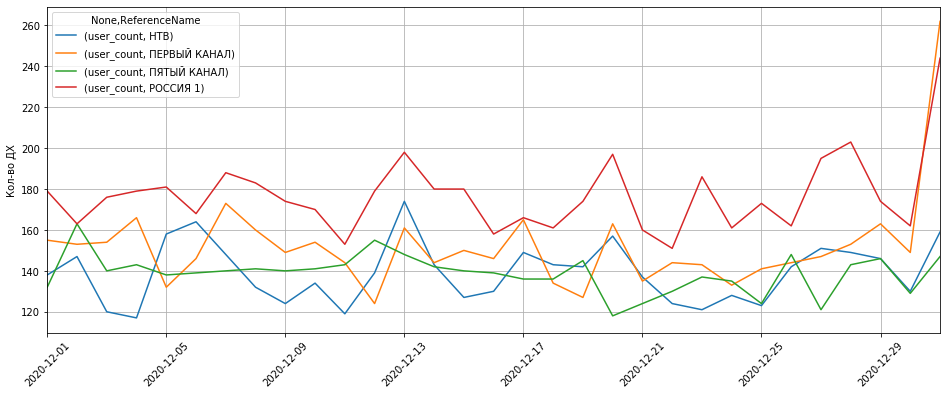

In [25]:
num_users_period(only4chanel, 'date')

На 31.12 приходится значительный рост просмотров (особенно у "России 1" и "Первый канал") связанный с новым годом. Втечение всего остального месяца показатели примерно на одном уровне. Самым популярным каналом является "Россия 1"

Поделим домохозяйства на дачи и дома.

In [26]:
only4chanel_house=only4chanel.query('Проект == "Дом"')
only4chanel_dacha=only4chanel.query('Проект == "Дача"')

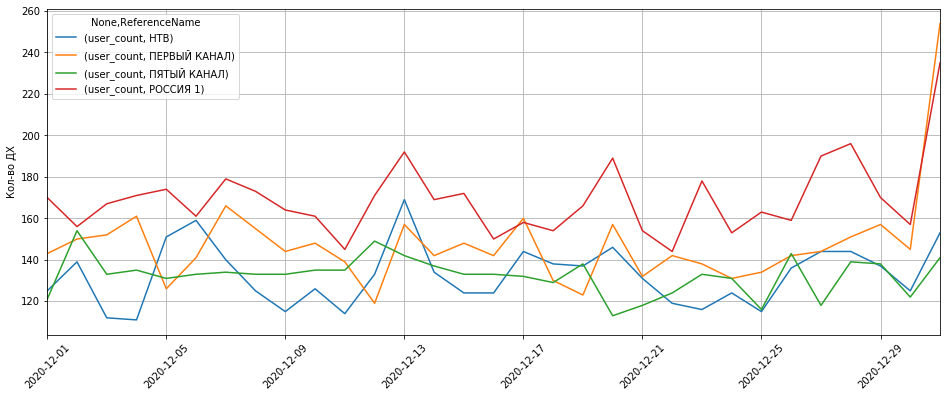

In [27]:
num_users_period(only4chanel_house, 'date')

График просмотров в Домах практически идентичен с общей картиной просмотров

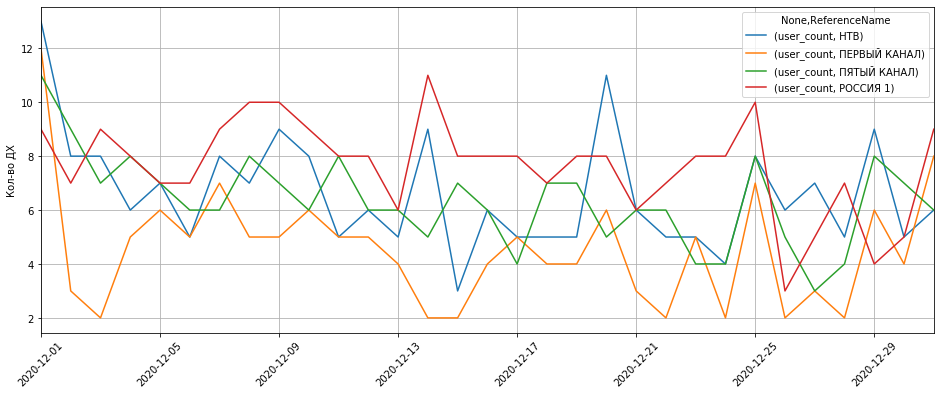

In [28]:
num_users_period(only4chanel_dacha, 'date')

График просмотров в Дачах отличается от Домов. Нет резкого роста просмотров в конце месяца и нет преимущества по просмотрам у канала "Россия 1".

### Повторить расчеты предыдущего вопроса для периода нажатия кнопки «нет зрителей» в прайм тайм (19:00-21:00). Какой % общего смотрения приходится на прайм. 

In [29]:
# Создал таблицу, где буду анализировать данные для периода нажатия кнопки «нет зрителей» 
no_viewers=only4chanel

In [30]:
to_datetime(no_viewers, 'Время нажатия кнопки НЕТ зрителей', '%Y-%m-%d %H:%M:%S')
to_datetime(no_viewers, 'Время отжатия кнопки НЕТ зрителей', '%Y-%m-%d %H:%M:%S')

- Сдвинул время на два часа назад, чтобы при расчетах времени не сталкиваться с тем, что сессии содержат данные о сутках с 2х до 2х. Время праймтайма также сдвинул на 2 часа назад.

In [31]:
# Сдвинул время на 2 часа
no_viewers['out_start'] = no_viewers['Время нажатия кнопки НЕТ зрителей'] - dt.timedelta(hours=2)
no_viewers['out_end'] = no_viewers['Время отжатия кнопки НЕТ зрителей'] - dt.timedelta(hours=2)

In [32]:
# Привел в нужный формат данные
no_viewers['out_start']=no_viewers['out_start'].dt.time
no_viewers['out_end']=no_viewers['out_end'].dt.time

In [33]:
# Устанавливаем нужные нам ограничения по времени для праймтайма
starttime=dt.time(17,0,0)
endtime=dt.time(19,0,0)

In [34]:
# Оставил только те сессии, которые попадают в наш диапозон включенной кнопки в праймтайм
no_viewers=no_viewers[(no_viewers.out_end >= starttime) & (no_viewers.out_start <= endtime)]

In [35]:
no_viewers.head()

,Дата,Договор,Проект,Серийный номер прибора,Время нажатия кнопки НЕТ зрителей,Время отжатия кнопки НЕТ зрителей,ReferenceID,ReferenceName,Время начала смотрения,Время окончания смотрения,session_duration,out_duration,date,out_start,out_end
21,2020-12-01,1001099,Дом,713854,2020-12-01 20:41:26,2020-12-02 00:08:48,499.0,ПЕРВЫЙ КАНАЛ,2020-12-01 16:37:56,2020-12-02 00:08:48,07:30:52,03:27:22,2020-12-01,18:41:26,22:08:48
35,2020-12-01,1001515,Дом,764558,2020-12-01 18:00:55,2020-12-02 00:06:22,501.0,РОССИЯ 1,2020-12-01 18:11:06,2020-12-01 20:04:43,01:53:37,06:05:27,2020-12-01,16:00:55,22:06:22
37,2020-12-01,1001515,Дом,764558,2020-12-01 18:00:55,2020-12-02 00:06:22,500.0,ПЯТЫЙ КАНАЛ,2020-12-01 20:04:43,2020-12-02 00:06:22,04:01:39,06:05:27,2020-12-01,16:00:55,22:06:22
96,2020-12-01,10100084,Дом,745629,2020-12-01 20:29:26,2020-12-01 22:18:28,323.0,ПЕРВЫЙ КАНАЛ,2020-12-01 20:45:27,2020-12-01 22:09:14,01:23:47,01:49:02,2020-12-01,18:29:26,20:18:28
97,2020-12-01,10100084,Дом,745629,2020-12-01 20:29:26,2020-12-01 22:18:28,323.0,ПЕРВЫЙ КАНАЛ,2020-12-01 22:09:26,2020-12-01 22:16:53,00:07:27,01:49:02,2020-12-01,18:29:26,20:18:28


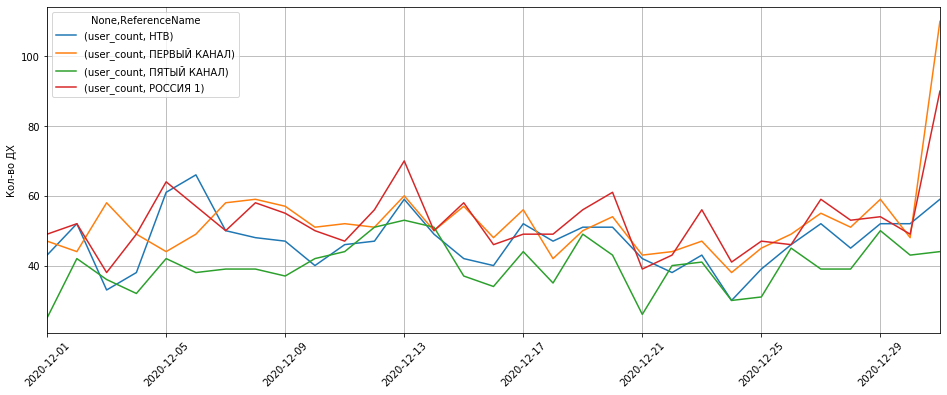

In [36]:
num_users_period(no_viewers, 'date')

Показатели просмотров при включенной кнопки повторяет распределение просмотров общего смотрения

In [37]:
# Поделил домохозяйства на дачи и дома
no_viewers_house=no_viewers.query('Проект == "Дом"')
no_viewers_dacha=no_viewers.query('Проект == "Дача"')

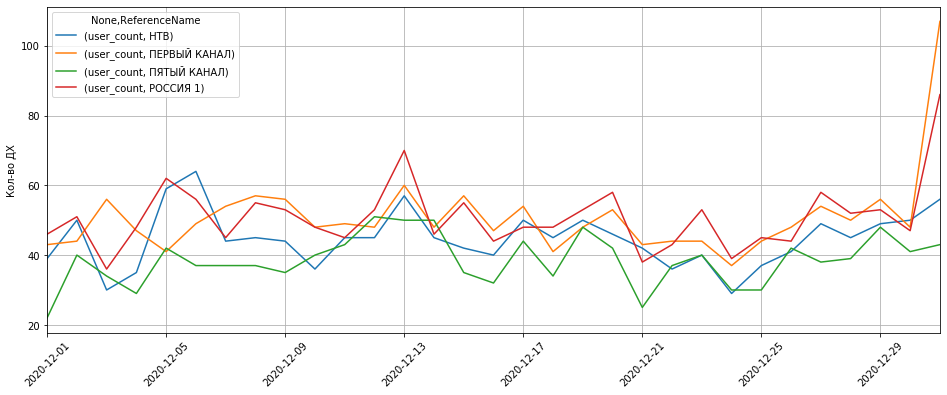

In [38]:
num_users_period(no_viewers_house, 'date')

Показатели проектов Дом схожи с общими показателями

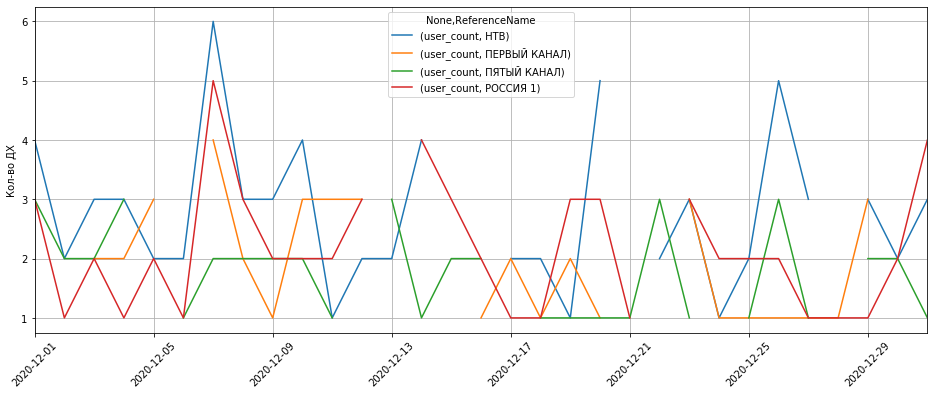

In [39]:
num_users_period(no_viewers_dacha, 'date')

Значений в проектах Дача весьма мало. Из-за этого сложно говорить о какой-то последовательности в данных

### Какой % общего смотрения приходится на прайм.

In [40]:
# Общее время просмотров
session_duration_sum=all_event.session_duration.sum()
session_duration_sum

Timedelta('4875 days 02:44:48')

In [41]:
# Сдвинул время на 2 часа и добавил новые колонки для фиксации времени начала и конца просмотра 
all_event['watch_start'] = all_event['Время начала смотрения'] - dt.timedelta(hours=2)
all_event['watch_end'] = all_event['Время окончания смотрения'] - dt.timedelta(hours=2)

In [42]:
# Привел в нужный формат данные
all_event['watch_start']=all_event['watch_start'].dt.time
all_event['watch_end']=all_event['watch_end'] .dt.time

In [43]:
# Создал таблицу, где оставил только те сессии, которые были в праймтайм
prime=all_event[(all_event.watch_end > starttime) & (all_event.watch_start < endtime)]

In [44]:
prime.head()

,Дата,Договор,Проект,Серийный номер прибора,Время нажатия кнопки НЕТ зрителей,Время отжатия кнопки НЕТ зрителей,ReferenceID,ReferenceName,Время начала смотрения,Время окончания смотрения,session_duration,out_duration,watch_start,watch_end
21,2020-12-01,1001099,Дом,713854,2020-12-01 20:41:26,2020-12-02 00:08:48,499.0,ПЕРВЫЙ КАНАЛ,2020-12-01 16:37:56,2020-12-02 00:08:48,07:30:52,03:27:22,14:37:56,22:08:48
35,2020-12-01,1001515,Дом,764558,2020-12-01 18:00:55,2020-12-02 00:06:22,501.0,РОССИЯ 1,2020-12-01 18:11:06,2020-12-01 20:04:43,01:53:37,06:05:27,16:11:06,18:04:43
37,2020-12-01,1001515,Дом,764558,2020-12-01 18:00:55,2020-12-02 00:06:22,500.0,ПЯТЫЙ КАНАЛ,2020-12-01 20:04:43,2020-12-02 00:06:22,04:01:39,06:05:27,18:04:43,22:06:22
46,2020-12-01,100658,Дом,701117,2020-12-01 20:36:35,2020-12-01 21:03:37,661.0,ДОМАШНИЙ,2020-12-01 20:17:44,2020-12-01 21:26:50,01:09:06,00:27:02,18:17:44,19:26:50
96,2020-12-01,10100084,Дом,745629,2020-12-01 20:29:26,2020-12-01 22:18:28,323.0,ПЕРВЫЙ КАНАЛ,2020-12-01 20:45:27,2020-12-01 22:09:14,01:23:47,01:49:02,18:45:27,20:09:14


In [45]:
# Сколько всего записей в таблице с сессиями в прайм
prime.shape

(25835, 14)

In [46]:
# Сколько всего записей в таблице с сессиями вообще
all_event.shape

(204655, 14)

In [47]:
# Посчитал какой % общего смотрения приходится на прайм
25835/204655*100

12.623683760474947

На сессии, которые попадают в прайм приходится 12.62% от общего числа.

### Частота использования кнопки «нет зрителей». Домохозяйства, которые чаще других используют кнопку «нет зрителей»

In [48]:
# Прочитал таблицу из файла 
use_button = pd.read_excel('Тестовое задание_Нет зрителей.xlsx', sheet_name='Использование кнопки')

In [49]:
df_info(use_button)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24537 entries, 0 to 24536
Data columns (total 6 columns):
Дата                          24537 non-null datetime64[ns]
Договор                       24537 non-null object
Проект                        24537 non-null object
Серийный номер прибора        24537 non-null int64
Кол-во раз                    24537 non-null int64
Длительность суммарно, сек    24537 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.1+ MB
None


,Дата,Договор,Проект,Серийный номер прибора,Кол-во раз,"Длительность суммарно, сек"
0,2020-12-01,1000616,Дом,701327,3,43049
1,2020-12-01,1000992,Дом,702092,1,1404
2,2020-12-01,1001099,Дом,713854,1,12442
3,2020-12-01,1001431,Дом,701330,1,7836
4,2020-12-01,1001474,Дом,701942,3,4602


,Серийный номер прибора,Кол-во раз,"Длительность суммарно, сек"
count,24537.000000,24537.000000,24537.000000
mean,734019.265517,2.276236,14074.374944
std,20876.269640,2.996137,18320.472997
min,688472.000000,1.000000,0.000000
25%,722891.000000,1.000000,1666.000000
50%,738714.000000,2.000000,6630.000000
75%,748580.000000,3.000000,19207.000000
max,765783.000000,292.000000,131606.000000


Пропущенные значения в датафрейме:
Дата                          0
Договор                       0
Проект                        0
Серийный номер прибора        0
Кол-во раз                    0
Длительность суммарно, сек    0
dtype: int64

Дубликаты: 0


Дубликатов и нулей нет

In [50]:
# Сколько уникальных домохозяйств
use_button['Договор'].nunique()

2075

In [51]:
# Сколько уникальных приборов
use_button['Серийный номер прибора'].nunique()

2803

У некоторых домохозяйств есть несколько приборов

In [52]:
# Создал таблицу, где постал частоту использования кнопки «нет зрителей» в день
frequency = use_button.groupby(['Договор']).agg(count = ('Кол-во раз','count'),sum = ('Кол-во раз','sum')).reset_index()
frequency['frequency']=frequency['sum']/frequency['count']
frequency=frequency.sort_values('frequency', ascending=False)
frequency.head(10)   

,Договор,count,sum,frequency
1700,15200015,13,217,16.692308
945,2301207,32,512,16.000000
2009,1210587-Д,1,14,14.000000
597,1211547,10,132,13.200000
1603,13700054,32,364,11.375000
1042,4100515,29,325,11.206897
1366,10300025,6,65,10.833333
751,1700664,32,306,9.562500
458,1208669,64,582,9.093750
1859,17500046,32,262,8.187500


In [53]:
df_info(frequency)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 1700 to 807
Data columns (total 4 columns):
Договор      2075 non-null object
count        2075 non-null int64
sum          2075 non-null int64
frequency    2075 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 81.1+ KB
None


,Договор,count,sum,frequency
1700,15200015,13,217,16.692308
945,2301207,32,512,16.000000
2009,1210587-Д,1,14,14.000000
597,1211547,10,132,13.200000
1603,13700054,32,364,11.375000


,count,sum,frequency
count,2075.000000,2075.000000,2075.000000
mean,11.825060,26.916627,1.764749
std,13.164223,45.142497,1.199209
min,1.000000,1.000000,1.000000
25%,1.500000,2.000000,1.000000
50%,6.000000,8.000000,1.500000
75%,20.000000,35.000000,2.000000
max,93.000000,582.000000,16.692308


Пропущенные значения в датафрейме:
Договор      0
count        0
sum          0
frequency    0
dtype: int64

Дубликаты: 0


Домохозяйства "15200015" и "2301207" используют кнопки «нет зрителей» в день чаще всех.

In [54]:
use_button.sort_values('Кол-во раз', ascending=False).head()

,Дата,Договор,Проект,Серийный номер прибора,Кол-во раз,"Длительность суммарно, сек"
9207,2020-12-12,4100515,Дом,714153,292,8421
21868,2020-12-29,15800040,Дом,692285,118,31993
8507,2020-12-11,6500242,Дом,746474,74,5332
2142,2020-12-03,2301207,Дом,723492,67,33318
18936,2020-12-25,2301207,Дом,723492,59,35936


Домохозяйство "4100515" в 2020-12-12 использовало кнопкиу«нет зрителей» 292 раз.

### Домохозяйства, объемы смотрения которого, значимо отличаются от других домохозяйств внутри проекта

In [55]:
# Поделим домохозяйства на дачи и дома
all_event_house=all_event.query('Проект == "Дом"')
all_event_dacha=all_event.query('Проект == "Дача"')

In [56]:
all_event_house.head()

,Дата,Договор,Проект,Серийный номер прибора,Время нажатия кнопки НЕТ зрителей,Время отжатия кнопки НЕТ зрителей,ReferenceID,ReferenceName,Время начала смотрения,Время окончания смотрения,session_duration,out_duration,watch_start,watch_end
0,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00,2020-12-01 07:52:35,499.0,ПЕРВЫЙ КАНАЛ,2020-12-01 05:16:22,2020-12-01 07:52:35,02:36:13,05:52:35,03:16:22,05:52:35
1,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00,2020-12-01 07:52:35,500.0,ПЯТЫЙ КАНАЛ,2020-12-01 02:06:40,2020-12-01 05:16:22,03:09:42,05:52:35,00:06:40,03:16:22
2,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00,2020-12-01 07:52:35,501.0,РОССИЯ 1,2020-12-01 02:00:00,2020-12-01 02:06:40,00:06:40,05:52:35,00:00:00,00:06:40
3,2020-12-01,1000616,Дом,701327,2020-12-01 07:53:13,2020-12-01 10:56:00,501.0,РОССИЯ 1,2020-12-01 10:45:45,2020-12-01 10:48:49,00:03:04,03:02:47,08:45:45,08:48:49
4,2020-12-01,1000616,Дом,701327,2020-12-01 07:53:13,2020-12-01 10:56:00,501.0,РОССИЯ 1,2020-12-01 10:01:36,2020-12-01 10:16:47,00:15:11,03:02:47,08:01:36,08:16:47


In [57]:
# Созданные таблицы сгруппировал по домохозяйствам и просуммировал сессии просмотров
all_event_house=all_event_house.groupby('Договор').agg(duration = ('session_duration', 'sum')).reset_index()
all_event_dacha=all_event_dacha.groupby('Договор').agg(duration = ('session_duration', 'sum')).reset_index()

- Просмотрел распределение просмотров по домам.

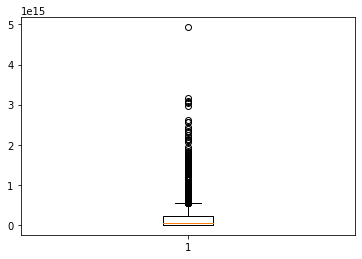

In [58]:
plt.boxplot(all_event_house['duration'])
plt.show()

- Просмотрел распределение просмотров по дачам.

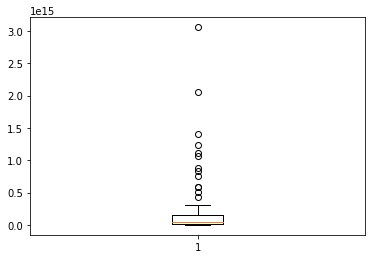

In [59]:
plt.boxplot(all_event_dacha['duration'])
plt.show()

Есть такие домохозяйства (и дома и дачи), которые смотрят намного больше чем основная масса.

In [60]:
# Показал какие дома больше остальных смотрят
all_event_house.sort_values(by='duration', ascending=False).head(10)

,Договор,duration
1592,15000114,57 days 01:18:41
479,1209854,36 days 12:40:16
1739,17100212,35 days 15:25:01
1372,11100029,35 days 12:39:15
429,1208669,35 days 07:43:41
478,1209828,34 days 05:46:57
726,1701686,30 days 09:20:27
884,2301168,29 days 18:34:34
1327,10400164,29 days 14:01:11
1375,11100060,28 days 08:38:18


- У некоторых домохозяйств есть несколько приборов, поэтому сумма просмотров за месяц превышает 31 день.

In [61]:
# Посчитал верхний процентиль
all_event_house.duration.quantile(0.9)

Timedelta('7 days 11:28:17.800000')

In [62]:
# Показал какие дочи больше остальных смотрят
all_event_dacha.sort_values(by='duration', ascending=False).head(10)

,Договор,duration
14,1207676-Д,35 days 09:15:28
52,15300132-Д,23 days 20:43:58
4,104074-Д,16 days 06:54:38
38,1212498-Д,14 days 08:41:28
56,16500270-Д,12 days 23:00:05
78,6100436-Д,12 days 07:09:01
71,3800793-Д,10 days 05:13:57
21,1210556-Д,9 days 17:04:30
69,3700362-Д,8 days 17:36:21
8,11100163-Д,6 days 20:23:21


In [63]:
# Посчитал верхний процентиль
all_event_dacha.duration.quantile(0.9)

Timedelta('8 days 04:02:27')

### При этом зафиксированы случаи, когда при нажатой кнопке «нет зрителей» осуществляется переключение каналов. Необходимо оценить объемы смотрения телеканалов в таких случаях.

In [64]:
# Прочитал таблицу из файла 
switch_count = pd.read_excel('Тестовое задание_Нет зрителей.xlsx', sheet_name='Переключение каналов')

In [65]:
df_info(switch_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16283 entries, 0 to 16282
Data columns (total 8 columns):
Дата                                 16283 non-null datetime64[ns]
Договор                              16283 non-null object
Проект                               16283 non-null object
Серийный номер прибора               16283 non-null int64
Время нажатия кнопки НЕТ зрителей    16283 non-null object
Время отжатия кнопки НЕТ зрителей    16283 non-null object
Кол-во переключений каналов          16283 non-null int64
Длительность суммарно, сек           16283 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 1017.8+ KB
None


,Дата,Договор,Проект,Серийный номер прибора,Время нажатия кнопки НЕТ зрителей,Время отжатия кнопки НЕТ зрителей,Кол-во переключений каналов,"Длительность суммарно, сек"
0,2020-12-01,1000616,Дом,701327,2020-12-01 02:00:00.000,2020-12-01 07:52:35.000,2,21155
1,2020-12-01,1000616,Дом,701327,2020-12-01 07:53:13.000,2020-12-01 10:56:00.000,5,14445
2,2020-12-01,1000616,Дом,701327,2020-12-01 22:57:52.000,2020-12-02 01:59:59.000,9,11801
3,2020-12-01,1001515,Дом,764557,2020-12-01 10:16:26.000,2020-12-01 13:15:57.000,1,10780
4,2020-12-01,1001515,Дом,764557,2020-12-01 13:16:05.000,2020-12-01 13:25:23.000,1,558


,Серийный номер прибора,Кол-во переключений каналов,"Длительность суммарно, сек"
count,16283.000000,16283.000000,16283.000000
mean,733822.119204,8.777682,14023.327949
std,20724.334566,14.882790,15329.415097
min,688472.000000,1.000000,7.000000
25%,722885.000000,1.000000,3272.000000
50%,738681.000000,4.000000,9014.000000
75%,748604.000000,9.000000,19158.000000
max,765783.000000,251.000000,88587.000000


Пропущенные значения в датафрейме:
Дата                                 0
Договор                              0
Проект                               0
Серийный номер прибора               0
Время нажатия кнопки НЕТ зрителей    0
Время отжатия кнопки НЕТ зрителей    0
Кол-во переключений каналов          0
Длительность суммарно, сек           0
dtype: int64

Дубликаты: 0


In [66]:
# Количество сессий с включенной кнопкой
switch_count['Кол-во переключений каналов'].sum()

142927

In [67]:
# Количество сессий
all_event.shape

(204655, 14)

In [68]:
# Процент таких просмотров к общему количеству
142927/204655*100

69.838020082578

Процент таких случаев к общему числу сессий составляет 69.83%

In [69]:
# Общее количество просмотров с включенной кнопкой в днях
days=all_event['out_duration'].unique().sum()
days = days.astype('timedelta64[D]')
days / np.timedelta64(1, 'D')

2606.0

In [70]:
# Общее время просмотров
session_duration_sum=all_event.session_duration.sum()
session_duration_sum

Timedelta('4875 days 02:44:48')

In [71]:
# Посчитал соотношение просмотров с включенной кнопкой и к общему времени
2606/4875*100

53.45641025641026

Время просмотров с включенной кнопкой к общему объему просмотров равна 53.45%

### Общий вывод

- Объемы смотрения телеканалов в случаях, когда при нажатой кнопке «нет зрителей» осуществляется переключение каналов весьма велики. По объему просмотров это 53.45% и 69.83% по частоте встречи таких сессий в данных. Это, наверно, связано с тем, что люди забывают нажимать данную кнопку в нужное время, из-за чего происходит подобная ошибка в данных. 

- По объему просмотров за все время лидирует "Пятый канал" в 673 дней за месяц.

- По количеству уникальных домохозяств в день, лидирует "Россия 1" По графикам именно "Россия 1" находится стабильно выше чем остальные каналы. Но "Россия 1" не стала самой просматриваемым каналом по итогу месяца, так как ее сессии просмотров меньше "Пятого канала"

- Под новый года самыми популярными каналами стали "Первый канал" и "Россия 1". Но стоит отметить что данный рост просмотров каналов не был отмечем у проекта "Дача". Для них 31.12 был обычным днем по просмотрам.

- Распределение просмотров по дачам и домам является нормальным с большим выбросом к большим показателям. Так, появляются некоторые домохозяйства, которые смотрят до 57 дней за месяц, из-за того, что у некоторых домов используется несколько приборов, поэтому сумма просмотров за месяц превышает 31 день.

- Среднее количество включений кнопки является 1.76 за день, но есть домохозяйства, которые используют ее по 16 раз на дню.

- Из всего этого можно заключить то, что необхоимо улучшение качества работы функции с кнопкой "нет зрителей". Так как функция включения кнопки практически не работает, так как люди, скорее всего забывают про нее и смортят передачи вместе с ней.